In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange
from sklearn.preprocessing import PolynomialFeatures
plt.style.use("seaborn-bright")
np.random.seed(0)

In [31]:
def random_split(data, train_ratio=0.7, val_ratio=0.2):
    
    maskt = np.random.random(len(df)) < train_ratio
    train = df[maskt]
    val_test = df[~maskt]
    maskv = np.random.random(len(val_test)) < val_ratio
    val = val_test[maskv]
    test = val_test[~maskv]
    x_train = np.array(train.drop("charges", axis=1))
    x_val = np.array(val.drop("charges", axis=1))
    x_test = np.array(test.drop("charges", axis=1))
    y_train = np.array(train["charges"])
    y_val = np.array(val["charges"])
    y_test = np.array(test["charges"])
    y_train.resize(y_train.shape[0], 1)
    y_val.resize(y_val.shape[0], 1)
    y_test.resize(y_test.shape[0], 1)
    return (x_train, y_train, x_val, y_val, x_test, y_test)

In [32]:
def gradient_descent(X, Y, lr=7e-5, epochs=100, penalty="none", lambd=0.1):
    
    N = X.shape[0]
    W = np.random.random(X.shape[1])
    W.resize(X.shape[1], 1)
    for _ in range(epochs):
        diff = np.dot(X, W) - Y
        error = np.sum(diff ** 2)
        dW = np.dot(X.T, diff)
        if penalty == "L1":
            error += (lambd/2) * np.abs(W)
            dW += (lambd * np.sign(W))
        elif penalty == "L2":
            error += (lambd/2) * np.sum(W ** 2)
            dW += (lambd * W)
        W -= lr * dW
    return W

In [33]:
def stocastic_gradient_descent(X, Y, lr=1e-2, epochs=7500, penalty="none", lambd=0.1):
    
    W = np.random.random(X.shape[1])
    for _ in range(epochs):
        i = randrange(X.shape[0])
        diff = np.dot(X[i], W.T) - Y[i]
        error = 0.5 * (np.sum(diff ** 2))
        dW = X[i] * diff
        if penalty == "L1":
            error += (lambd/2) * np.abs(W)
            dW += (lambd * np.sign(W))
        elif penalty == "L2":
            error += (lambd/2) * np.sum(W ** 2)
            dW += (lambd * W)
        W -= lr * dW
    W.resize(W.shape[0], 1)
    return W

In [34]:
def evaluate(W, X, Y):

    return (np.sum((np.dot(X, W) - Y) ** 2) / (2*X.shape[0]))

In [35]:
df = pd.read_csv("insurance.csv").drop("children", axis=1)
target = df["charges"]
df = df.drop("charges", axis=1)
poly_features = PolynomialFeatures(degree=10)
temp = poly_features.fit_transform(np.array(df))
df = pd.DataFrame(temp)
df["charges"] = target
df = (df - df.min()) / (df.max() - df.min())
df[0] = np.ones(len(df))

In [36]:
x_train, y_train, x_val, y_val, x_test, y_test = random_split(df)

In [67]:
opt_lamdb, MVLE, opt_W = 0, 1e10, 0
for _ in range(10):
    lambd = np.round(np.random.random(), 2)
    W = stocastic_gradient_descent(x_train, y_train, penalty="L2", lambd=lambd, epochs=10000)
    val_error = evaluate(W, x_val, y_val)
    if val_error < MVLE:
        MVLE = val_error
        opt_lambd = lambd
        opt_W = W
print(opt_lambd)
print(evaluate(opt_W, x_test, y_test))

0.28
0.018866338238313896


<IPython.core.display.Javascript object>


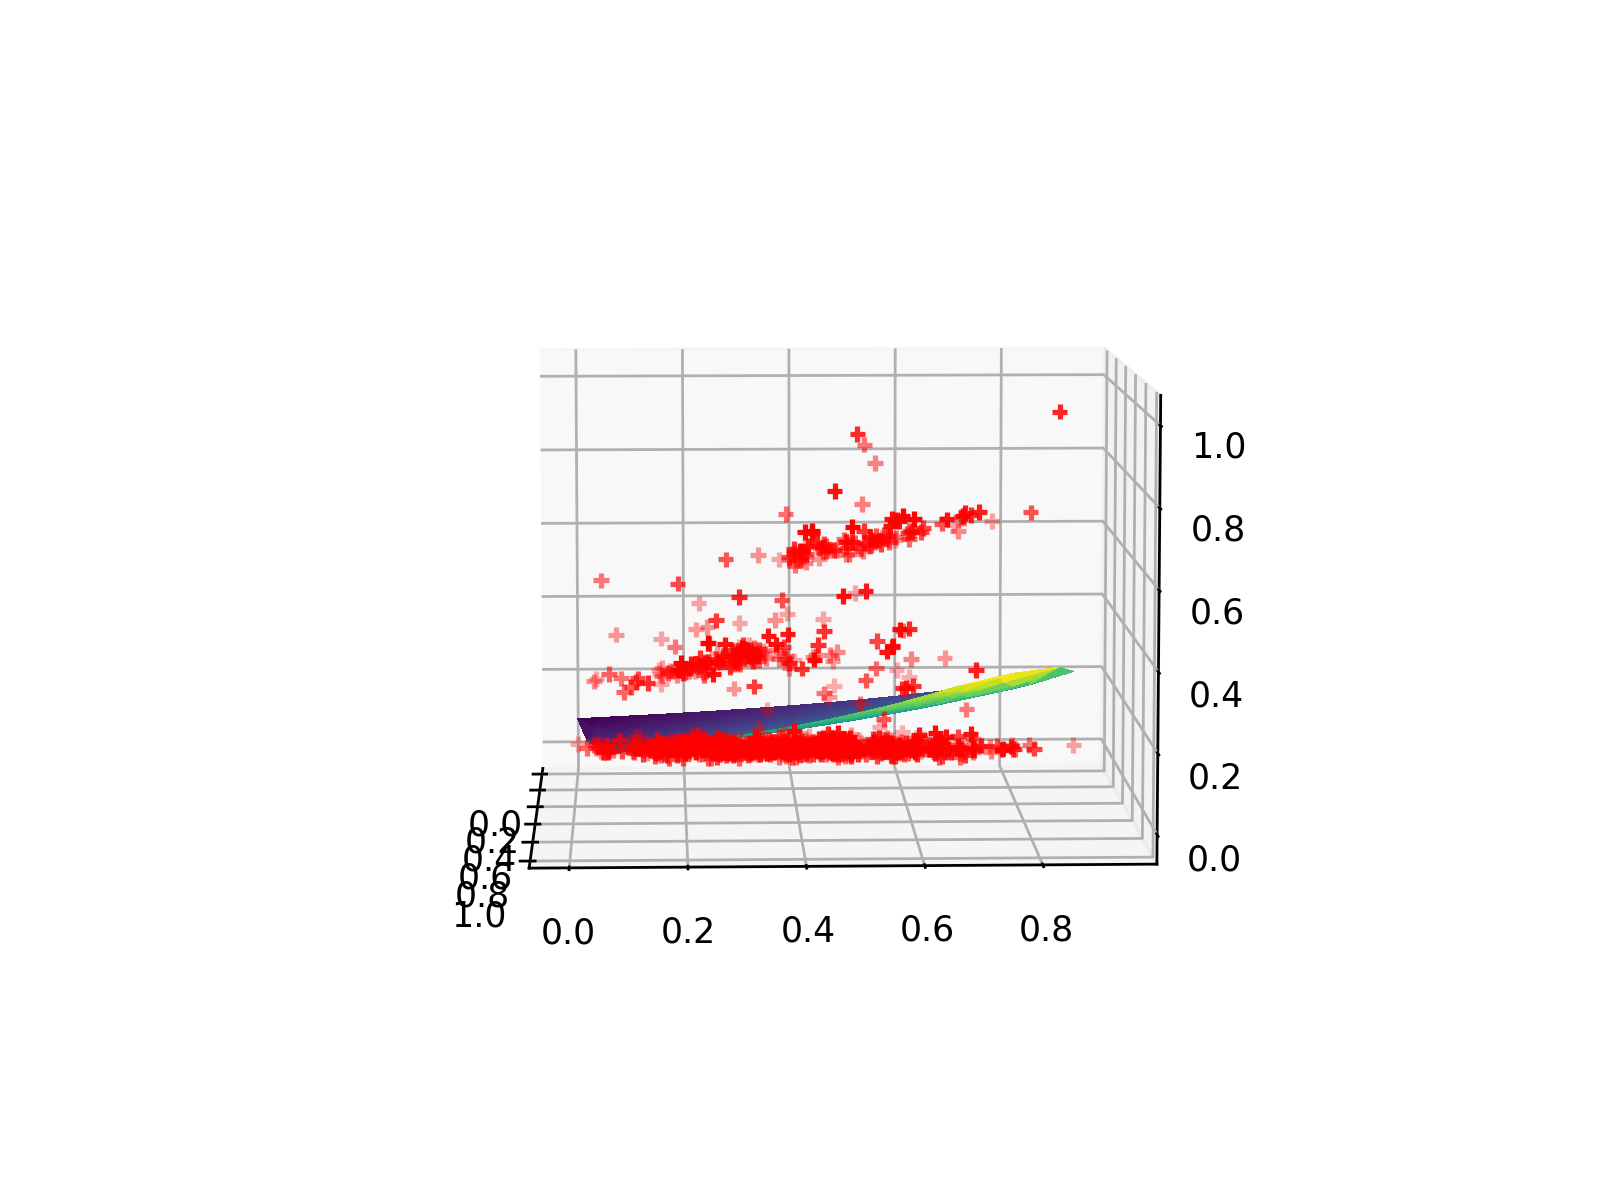

In [68]:
ax = plt.figure().gca(projection="3d")
x = x_train[:,1]
y = x_train[:,2]
z = np.dot(x_train, opt_W).flatten()
ax.scatter(x, y, y_train.flatten(), color='r', marker='+')
ax.plot_trisurf(x, y, z, cmap="viridis", antialiased=False)